In [5]:
# from google.colab import files
# uploaded = files.upload()
# import numpy as np
import pandas as pd


In [6]:
h = pd.read_csv("Mumbai2.csv")

In [7]:
h.head()

,Price,Area,Location,Bedrooms,Resale,Gymnasium,Lift,Parking,Maintenance,Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas_Conn,Jogging Track,Swimming Pool
0,200000.0,420,Virar East,1,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
1,200000.0,275,Thane,1,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No
2,200000.0,400,Kharegaon,1,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No
3,200000.0,540,Vasind,1,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,No
4,200000.0,220,Mira Road East,1,No,No,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No


In [ ]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Unnamed: 0       6347 non-null   int64
 1   Price            6347 non-null   int64
 2   Area             6347 non-null   int64
 3   No._of_Bedrooms  6347 non-null   int64
 4   Resale           6347 non-null   int64
 5   Gymnasium        6347 non-null   int64
 6   Lift             6347 non-null   int64
 7   Parking          6347 non-null   int64
 8   Maintenance      6347 non-null   int64
 9   Security         6347 non-null   int64
 10  Clubhouse        6347 non-null   int64
 11  Intercom         6347 non-null   int64
 12  Gas_Conn         6347 non-null   int64
 13  Swimming_Pool    6347 non-null   int64
dtypes: int64(14)
memory usage: 694.3 KB


In [ ]:
# from pandas.core.base import value_counts
# h["Location"].value_counts()

In [ ]:
h.describe()

,Unnamed: 0,Price,Area,No._of_Bedrooms,Resale,Gymnasium,Lift,Parking,Maintenance,Security,Clubhouse,Intercom,Gas_Conn,Swimming_Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.496297,0.484796,0.243107,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.500026,0.499808,0.428993,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**For plotting Histograms**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1795c5890>,
      dtype=object)

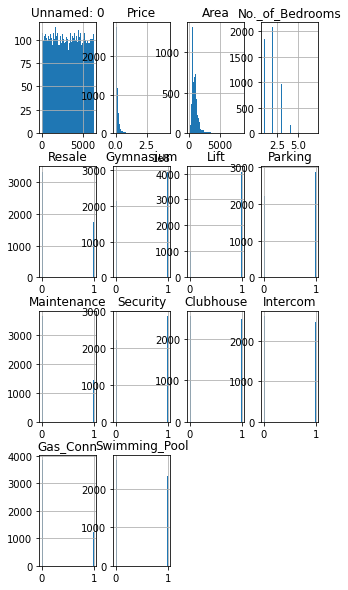

In [ ]:
import matplotlib.pyplot as plot
h.hist(bins=50,figsize=(5,10))

**TRAIN-TEST SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(h,test_size=0.2,random_state=69)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 5077
Rows in test set: 1270


**T0 share the data in equal wheitage of vision of Model(Special features)**

In [ ]:
h.head()

,Unnamed: 0,Price,Area,No._of_Bedrooms,Resale,Gymnasium,Lift,Parking,Maintenance,Security,Clubhouse,Intercom,Gas_Conn,Swimming_Pool
0,0,4850000,720,1,0,0,1,1,1,1,0,0,0,0
1,1,4500000,600,1,0,1,1,1,1,1,1,0,0,1
2,2,6700000,650,1,0,1,1,1,1,1,1,1,0,1
3,3,4500000,650,1,0,0,1,1,1,1,0,1,0,0
4,4,5000000,665,1,0,0,1,1,1,1,0,1,0,0


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 ,random_state=69)
for train_index,test_index in split.split(h,h['No._of_Bedrooms']):
  strat_train_set = h.loc[train_index]
  strat_test_set = h.loc[test_index]

NameError: ignored

In [ ]:
strat_train_set['No._of_Bedrooms'].value_counts()

2    2080
1    1845
3     961
4     152
5      31
6       6
7       2
Name: Bedrooms, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 ,random_state=69)
for train_index,test_index in split.split(h,h['Swimming_Pool']):
  strat_train_set = h.loc[train_index]
  strat_test_set = h.loc[test_index]

In [ ]:
strat_test_set['Swimming_Pool'].value_counts()

0    688
1    582
Name: Swimming_Pool, dtype: int64

In [ ]:
corr_matrix = h.corr()
corr_matrix['Price'].sort_values(ascending=True)

Unnamed: 0        -0.081197
Maintenance        0.034308
Resale             0.034633
Security           0.049895
Intercom           0.060459
Parking            0.061944
Lift               0.082830
Clubhouse          0.086790
Gymnasium          0.101983
Gas_Conn           0.113071
Swimming_Pool      0.129257
No._of_Bedrooms    0.604739
Area               0.730793
Price              1.000000
Name: Price, dtype: float64

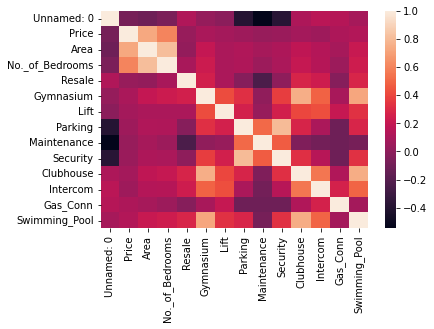

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt



dataplot = sb.heatmap(h.corr())
plt.show()

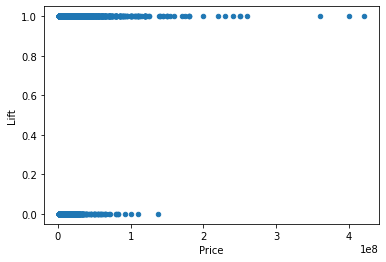

In [ ]:
h.plot(kind="scatter",x="Price",y="Lift",alpha=1) #No need to run

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(h)

SimpleImputer(strategy='median')

In [ ]:
h=strat_train_set.copy()

In [ ]:
X= imputer.transform(h)

In [ ]:
h_tr=pd.DataFrame(X,columns=h.columns)

In [ ]:
h_tr.describe()       #Not nessescory tu run

,Unnamed: 0,Price,Area,No._of_Bedrooms,Resale,Gymnasium,Lift,Parking,Maintenance,Security,Clubhouse,Intercom,Gas_Conn,Swimming_Pool
count,5077.000000,5.077000e+03,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000,5077.000000
mean,3160.005712,1.528188e+07,1009.117983,1.914319,0.342131,0.580461,0.801655,0.566279,0.280284,0.565688,0.493599,0.486311,0.242860,0.458342
std,1836.225335,2.066497e+07,571.173704,0.870872,0.474470,0.493532,0.398793,0.495636,0.449182,0.495715,0.500008,0.499862,0.428853,0.498311
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1569.000000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3155.000000,9.500000e+06,902.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4740.000000,1.750000e+07,1190.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
h_labels= strat_train_set["Price"].copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler())
])

In [ ]:
h_num_tr = my_pipeline.fit_transform(h)
print(h_num_tr)

[[ 0.16066838 -0.35241274  0.0715825  ...  1.02776364  1.76567249
   1.08709664]
 [-1.45094835 -0.41048775  0.42177317 ...  1.02776364 -0.56635645
   1.08709664]
 [-0.92536195  1.14785824  1.56339474 ... -0.97298636  1.76567249
  -0.91988142]
 ...
 [-0.38615933  5.06792112  2.73303156 ... -0.97298636 -0.56635645
  -0.91988142]
 [-0.91337967 -0.44678463  0.41476936 ... -0.97298636 -0.56635645
  -0.91988142]
 [ 0.61327179 -0.37661066  0.15913017 ... -0.97298636 -0.56635645
  -0.91988142]]


In [ ]:
h_num_tr.shape

(5077, 14)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor()
#model = DecisionTreeRegressor()
model = LinearRegression()
model.fit(h_num_tr,h_labels)

LinearRegression()

In [ ]:
some_data = h.iloc[:5000]

In [ ]:
some_labels = h_labels.iloc[:5000]

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
h.iloc[2]

Unnamed: 0             1461
Price              39000000
Area                   1902
No._of_Bedrooms           3
Resale                    0
Gymnasium                 1
Lift                      1
Parking                   1
Maintenance               1
Security                  1
Clubhouse                 1
Intercom                  0
Gas_Conn                  1
Swimming_Pool             0
Name: 1461, dtype: int64

In [ ]:
model.predict(prepared_data)

array([ 7999999.99999999,  6800000.00000001, 38999999.99999999, ...,
       16499999.99999999,  4200000.00000002,  8499999.99999999])

In [ ]:
some_labels

3455     8000000
496      6800000
1461    39000000
1003     4700000
4589     4100000
          ...   
4692     3900000
1549    11000000
5266    16500000
5961     4200000
574      8500000
Name: Price, Length: 5000, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
h_prediction = model.predict(h_num_tr)
lin_mse = mean_squared_error(h_labels,h_prediction)
lin_rmse =np.sqrt(lin_mse)
print(lin_rmse)

2.3647603325839513e-08


In [ ]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,h_num_tr,h_labels,scoring="neg_mean_squared_error",cv=10)

In [ ]:
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([3.19629080e-08, 8.54070170e-08, 1.82505417e-08, 1.65054575e-08,
       2.83823978e-08, 1.95171371e-08, 2.50014827e-08, 1.49486161e-08,
       1.23522743e-08, 2.19178422e-08])

In [ ]:
def print_score(scores):
  print("Scores",scores)
  print("Mean",scores.mean())
  print("Standard Deviation", scores.std())

In [ ]:
print_score(rmse_scores)

Scores [3.19629080e-08 8.54070170e-08 1.82505417e-08 1.65054575e-08
 2.83823978e-08 1.95171371e-08 2.50014827e-08 1.49486161e-08
 1.23522743e-08 2.19178422e-08]
Mean 2.742456744957955e-08
Standard Deviation 2.017031069841021e-08


In [ ]:
x_test = strat_test_set.drop("Price",axis=1)
y_test = strat_test_set["Price"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Price

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
import joblib
joblib.dump(LinearRegression,'my_model1.pkl')

['my_model1.pkl']

In [ ]:
model_test=joblib.load("my_model1.pkl")

In [ ]:
def Fetch(Area,Bed,Pool):
  for i in range (len(h)):

    if h.loc[i]['Area']>=Area and h.loc[i]['No._of_Bedrooms']>=int(Bed)  :
      if h.loc[i]['Resale']==1:
        print("Resaleable House")
      else:
        print("Resale-Null")

      if h_labels.loc[i]['Gymnasium']==1:
        print("Gym Available")
      else:
        print("Gym-Null")

      if h_tr.loc[i]['Lift']==1:
        print("Lift Available")
      else:
        print("Lift-Null")

      if h.loc[i]['Maintenance']==1:
        print("Staff for Maintenance")
      else:
        print("Maintanance-Null")

      if h.loc[i]['Security']==1:
        print("Security 24*7")
      else:
        print("Security-Null")

      if h.loc[i]['Intercom']==1:
        print("Intercom Authentication")
      else:
        print("Intercom-Null")

      if h.loc[i]['Gas_Conn']==1:
        print("Gas Connection available")
      else:
        print("Gas Connection-Null")

      print("Price: "+ str(h.loc[i]['Price']))
      print("------------------------------------------------------------")